# TP Python for Finance: Introduction to Option Pricing - Corrected Version
{{< downloadthis tp_option_seller_corrected.ipynb dname=File label="Telecharger le Notebook de TP" icon=file-earmark-jupyter type=success >}}

## Question 1: Data Collection
Using the `yfinance` library, download daily price data for the stock "AAPL" (Apple Inc.) for the last year. Calculate and plot the daily returns of the stock.


[*********************100%***********************]  1 of 1 completed


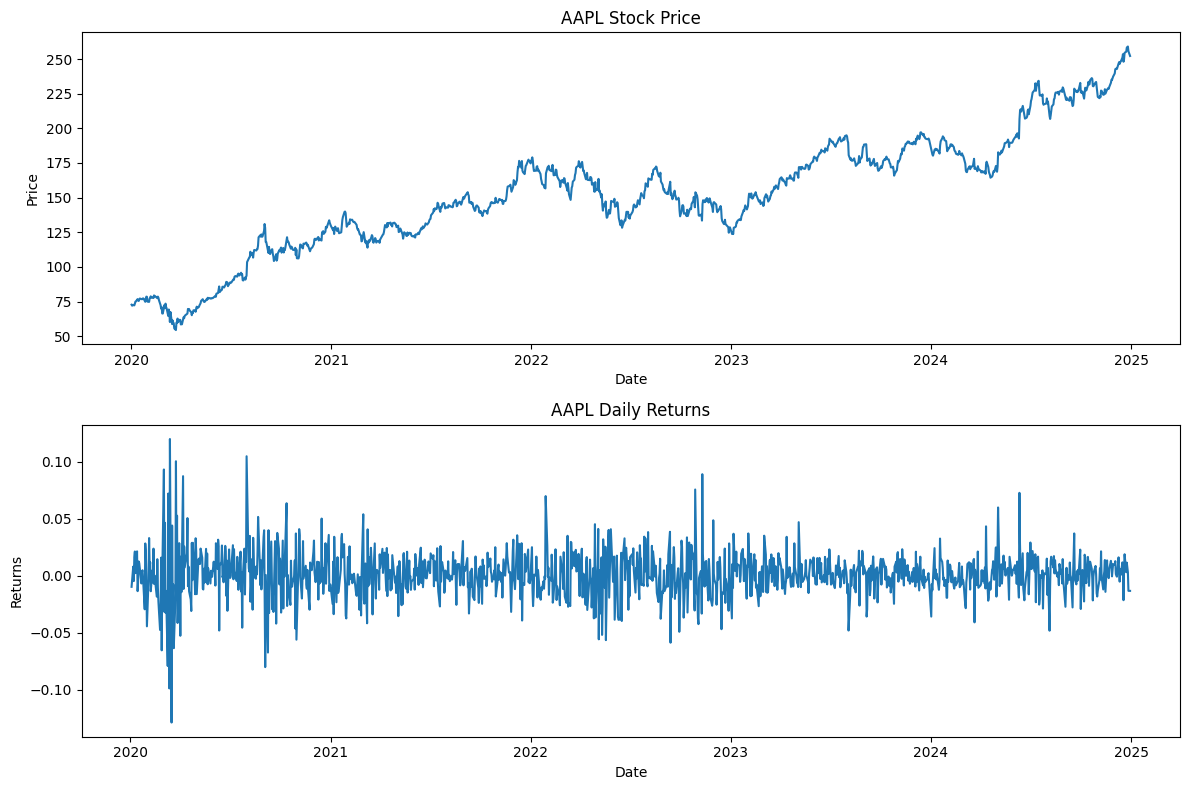

In [64]:

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download the data
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2024-12-31"

# Your code here to:
# 1. Download the data using yfinance
# 2. Calculate daily returns
# 3. Create a plot of the stock price and returns

# Download the data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Calculate daily returns
stock_data['Returns'] = stock_data['Close'].pct_change()

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot stock price
ax1.plot(stock_data.index, stock_data['Close'])
ax1.set_title('AAPL Stock Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')

# Plot returns
ax2.plot(stock_data.index, stock_data['Returns'])
ax2.set_title('AAPL Daily Returns')
ax2.set_xlabel('Date')
ax2.set_ylabel('Returns')

plt.tight_layout()
plt.show()

## Question 2: Understanding Call Options
A Call option is a financial contract that gives the buyer the right (but not the obligation) to buy a stock at a predetermined price (strike price) at a future date (expiration date). The seller of the option (writer) receives a premium for taking on the obligation to sell at the strike price if the buyer exercises their right.

Example: If you buy a call option for AAPL with:
- Strike price (K) = $180
- Current price (S) = $170
- Expiration = 1 month

If at expiration:
- AAPL price = $190: Your profit = $190 - $180 = $10 (minus the premium paid)
- AAPL price = $170: Your loss = premium paid

Create a function that calculates the payoff of a call option at expiration.

In [65]:
# Your code here to:
# Create a function that takes as input:
# - Strike price (K)
# - Current price (S)
# And returns the payoff at expiration

## Correction 2:

def call_payoff(S, K):
    """
    Calculate the payoff of a call option at expiration
    
    Parameters:
    S (float): Stock price at expiration
    K (float): Strike price
    
    Returns:
    float: Payoff of the call option
    """
    return max(S - K, 0)

# Test the function
test_prices = [160, 170, 180, 190, 200]
strike = 180

print("Testing call option payoff with strike price =", strike)
for price in test_prices:
    print(f"Stock price: {price}, Payoff: {call_payoff(price, strike)}")

Testing call option payoff with strike price = 180
Stock price: 160, Payoff: 0
Stock price: 170, Payoff: 0
Stock price: 180, Payoff: 0
Stock price: 190, Payoff: 10
Stock price: 200, Payoff: 20



## Question 3: Monte Carlo Simulation
Create a function that simulates future stock prices using Monte Carlo simulation. We'll use the following assumptions:
- Stock returns are normally distributed (Note: This is a simplifying assumption that doesn't hold well in reality)
- The volatility is estimated from historical data


In [66]:
# Your code here to:
# 1. Create a function that simulates stock paths
# 2. Use it to estimate option prices

def simulate_stock_price(S0, sigma, T, n_simulations):
    """
    Simulate future stock prices using Monte Carlo
    
    Parameters:
    S0 (float): Initial stock price
    sigma (float): Volatility (annualized)
    T (float): Time to expiration (in years)
    n_simulations (int): Number of simulations
    
    Returns:
    numpy.array: Array of simulated prices
    """
    # Generate random returns
    Z = np.random.normal(0, 1, n_simulations)
    
    # Calculate final stock prices
    ST = S0 * np.exp(sigma * np.sqrt(T) * Z - 0.5 * sigma**2 * T)
    
    return ST

def estimate_call_price(S0, K, sigma, T, n_simulations):
    """
    Estimate call option price using Monte Carlo simulation
    """
    # Simulate final stock prices
    ST = simulate_stock_price(S0, sigma, T, n_simulations)
    
    # Calculate payoffs
    payoffs = np.maximum(ST - K, 0)
    
    # Calculate option price (simplified - no discounting)
    option_price = np.mean(payoffs)
    
    return option_price

# Test the functions
S0 = 170  # Current stock price
K = 180   # Strike price
sigma = 0.2  # Volatility (20%)
T = 1/12    # Time to expiration (1 month)
n_simulations = 10000

price = estimate_call_price(S0, K, sigma, T, n_simulations)
print(f"Estimated call option price: {price:.2f}")

Estimated call option price: 0.81


## Question 4: Competing Option Sellers
Two option sellers are competing in the market. They use different methods to estimate volatility:
- Seller 1: Uses 5-day rolling standard deviation
- Seller 2: Uses 10-day rolling standard deviation

Follow these steps to simulate their competition:

1. First, calculate the rolling volatility for each seller:
   - Use `rolling()` function with window=5 for seller 1
   - Use `rolling()` function with window=10 for seller 2
   - Don't forget to use `.std()` to get the standard deviation

2. For each day, calculate the option price that each seller would offer:
   - Use the `estimate_call_price` function we created earlier
   - You can use `apply()` with a lambda function to calculate prices
   - Each seller uses their own volatility estimate

3. Determine which seller makes the sale:
   - The seller with the lower price wins the trade
   - Use comparison operators and `astype(int)` to create indicator variables

4. Calculate the payoff of the options:
   - Remember: payoff = max(0, future_price - strike_price)
   - Use `shift(-1)` to get the next day's price
   - Use `apply()` with `lambda x: max(x, 0)` for the payoff

5. Calculate the PnL for each seller:
   - PnL = (premium received - option payoff) when seller wins the trade
   - Use the indicator variables from step 3

6. Plot the cumulative PnL:
   - Use `cumsum()` to calculate cumulative sums
   - Use `plot()` to visualize the results


<Axes: xlabel='Date'>

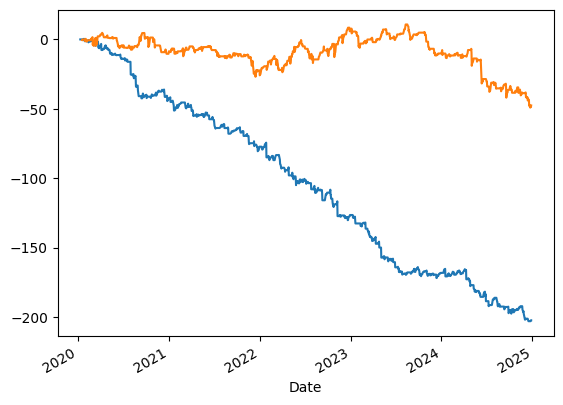

In [67]:
# Your code here:

# 1. Calculate rolling volatilities
stock_data['vol_5d'] = ...
stock_data['vol_10d'] = ...

# 2. Calculate option prices for each seller
stock_data['seller_1_price'] = ...
stock_data['seller_2_price'] = ...

# 3. Determine who makes each sale
stock_data['seller_1_sold'] = ...
stock_data['seller_2_sold'] = ...

# 4. Calculate option payoffs
stock_data['Option Payoff'] = ...

# 5. Calculate PnL for each seller
stock_data['seller_1_pnl'] = ...
stock_data['seller_2_pnl'] = ...

# 6. Plot cumulative PnL
...

stock_data['vol_5d'] = stock_data['Returns'].rolling(5).std()
stock_data['vol_10d'] = stock_data['Returns'].rolling(10).std()
stock_data['seller_1_price'] = stock_data.apply(lambda x: estimate_call_price(x['Close']['AAPL'], x['Close']['AAPL'], x['vol_5d'].values, 1, 10000), axis=1)
stock_data['seller_2_price'] = stock_data.apply(lambda x: estimate_call_price(x['Close']['AAPL'], x['Close']['AAPL'], x['vol_10d'].values, 1, 10000), axis=1)
stock_data['seller_1_sold'] = (stock_data['seller_1_price'] <  stock_data['seller_2_price']).astype(int)
stock_data['seller_2_sold'] = 1 - stock_data['seller_1_sold']
stock_data['Option Payoff'] = (stock_data['Close']['AAPL'].shift(-1) - stock_data['Close']['AAPL']).apply(lambda x: max(x, 0))
stock_data['seller_1_pnl'] = stock_data['seller_1_sold'] * (stock_data['seller_1_price'] - stock_data['Option Payoff'])
stock_data['seller_2_pnl'] = stock_data['seller_2_sold'] * (stock_data['seller_2_price'] - stock_data['Option Payoff'])
stock_data['seller_1_pnl'].cumsum().plot()
stock_data['seller_2_pnl'].cumsum().plot()

### Question 4.2:
Create the degenerated case with only one option seller, and see how the choice of sigma impact the obtained PnL 

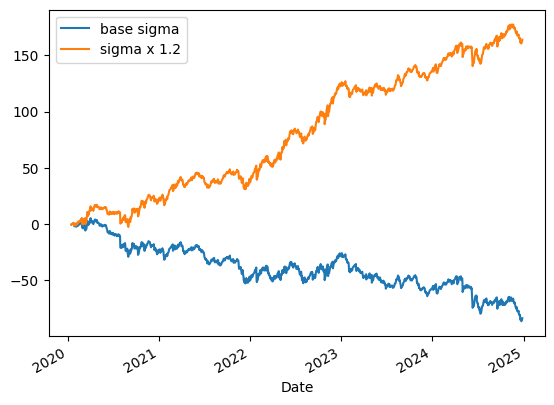

In [61]:
stock_data['vol_5d'] = stock_data['Returns'].rolling(10).std() 
stock_data['seller_1_price'] = stock_data.apply(lambda x: estimate_call_price(x['Close']['AAPL'], x['Close']['AAPL'], x['vol_5d'].values, 1, 10000), axis=1)
stock_data['seller_1_sold'] = 1
stock_data['Option Payoff'] = (stock_data['Close']['AAPL'].shift(-1) - stock_data['Close']['AAPL']).apply(lambda x: max(x, 0))
stock_data['seller_1_pnl'] = stock_data['seller_1_sold'] * (stock_data['seller_1_price'] - stock_data['Option Payoff'])
stock_data['seller_1_pnl'].cumsum().plot(label = 'base sigma')

stock_data['vol_5d'] = stock_data['Returns'].rolling(10).std() * 1.2
stock_data['seller_1_price'] = stock_data.apply(lambda x: estimate_call_price(x['Close']['AAPL'], x['Close']['AAPL'], x['vol_5d'].values, 1, 10000), axis=1)
stock_data['seller_1_sold'] = 1
stock_data['Option Payoff'] = (stock_data['Close']['AAPL'].shift(-1) - stock_data['Close']['AAPL']).apply(lambda x: max(x, 0))
stock_data['seller_1_pnl'] = stock_data['seller_1_sold'] * (stock_data['seller_1_price'] - stock_data['Option Payoff'])
stock_data['seller_1_pnl'].cumsum().plot(label = 'sigma x 1.2')
plt.legend()
plt.show()